In [10]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [11]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"]=yearly["deaths"]/yearly["births"]

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly.head(6)
yearly2 = yearly.tail(6)

# Print out yearly1
yearly1
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


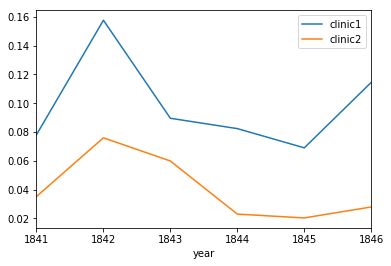

In [12]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax=yearly1.plot(x="year",y="proportion_deaths",label="clinic1")
yearly2.plot(x="year",y="proportion_deaths",label="clinic2",ax=ax)

In [13]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv",parse_dates=["date"])
monthly
# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"]/monthly["births"]

# Print out the first rows in monthly
monthly.head(10)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
5,1841-06-01,200,10,0.050000
6,1841-07-01,190,16,0.084211
7,1841-08-01,222,3,0.013514
8,1841-09-01,213,4,0.018779
9,1841-10-01,236,26,0.110169


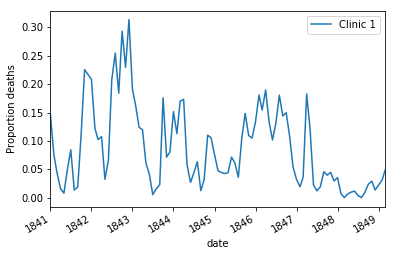

In [14]:
# Plot monthly proportion of deaths
ax=monthly.plot(x="date",y="proportion_deaths",label="Clinic 1")
ax.set_ylabel("Proportion deaths")

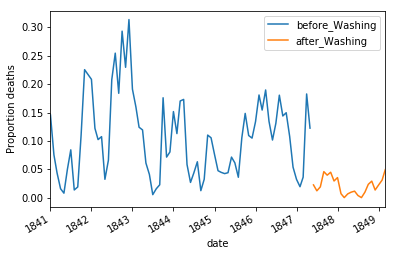

In [15]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_washing.head(5)
after_washing.head(5)
# Plot monthly proportion of deaths before and after handwashing
ax=before_washing.plot(x="date",y="proportion_deaths",label ="before_Washing")
after_washing.plot(x="date",y="proportion_deaths",label ="after_Washing",ax=ax)
ax.set_ylabel("Proportion deaths")

In [16]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
print(after_proportion.mean())
print(before_proportion.mean())
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

0.021093375097254535
0.10504998260908793


-0.0839566075118334

In [17]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.101216
0.975   -0.067307
dtype: float64

In [18]:
#Hence,we conclude that for a confidence interval of 95% the deaths decreased by 6% to 10% after doctors started washing hands!